In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


load the dataset

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

 The dataset has 1000 rows and 8 columns

 The dataset has no missing values

Numerical features: math score, reading score, writing score

Categorical features: gender, parental education, lunch, test preparation course.

In [6]:
df.columns = df.columns.str.replace(" ", "_")


In [7]:
df["FinalResult"] = np.where(df["math_score"] >= 40, "Pass", "Fail")


Score distribution graph

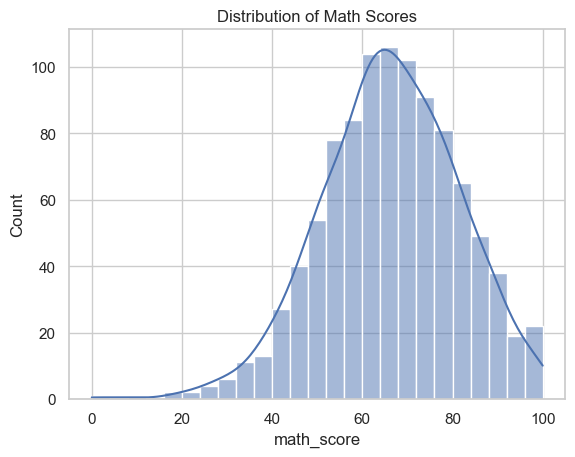

In [8]:
plt.figure()
sns.histplot(df["math_score"], kde=True)
plt.title("Distribution of Math Scores")
plt.show()


From the graph we can say that:

Distribution is left skewed

Majority of students score between 50 and 80

Graph of Reading scroe VS Math score

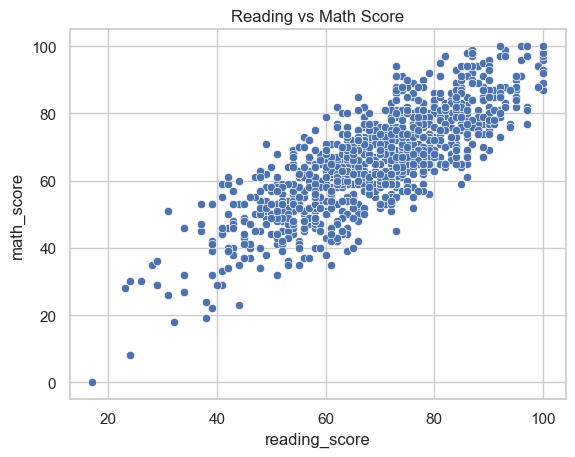

In [9]:
plt.figure()
sns.scatterplot(x="reading_score", y="math_score", data=df)
plt.title("Reading vs Math Score")
plt.show()


From the graph we can conclude that:

Strong  positive correlation

Indicates students with better reading skills tend to score higher in math

Gender based performance:

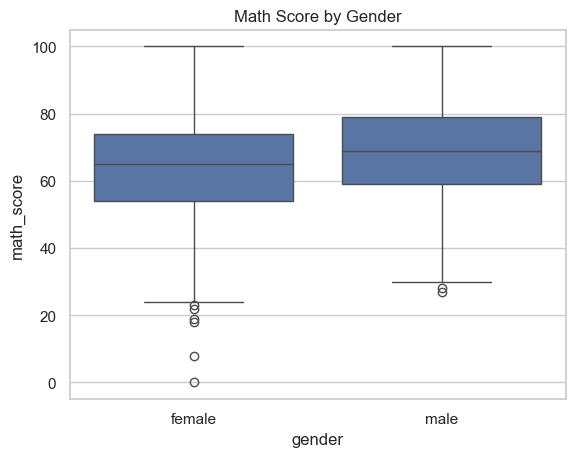

In [10]:
plt.figure()
sns.boxplot(x="gender", y="math_score", data=df)
plt.title("Math Score by Gender")
plt.show()


From the plot we can conclude that:

Median scores do not differ significantly

No strong gender bias observed

Parental Education Impact:

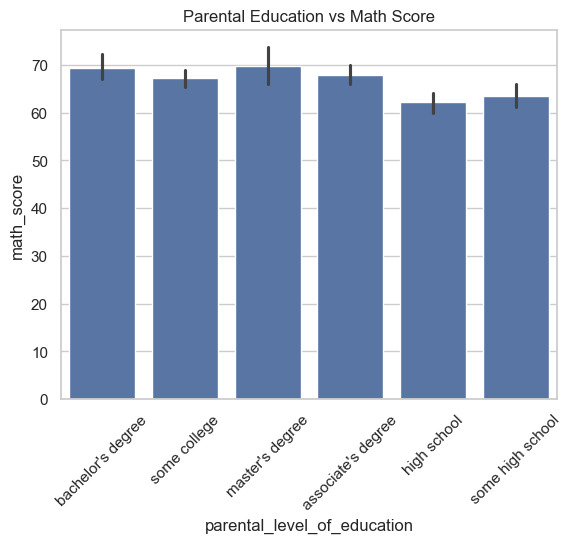

In [11]:
plt.figure()
sns.barplot(x="parental_level_of_education", y="math_score", data=df)
plt.xticks(rotation=45)
plt.title("Parental Education vs Math Score")
plt.show()


Higher parental education shows higher average scores

Socio-economic influence detected

pass or fail:

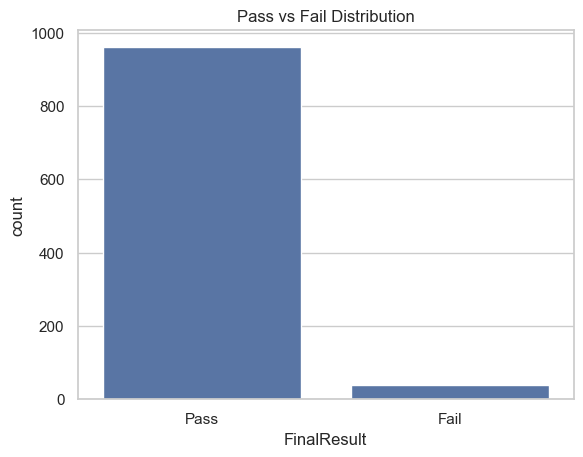

In [12]:
plt.figure()
sns.countplot(x="FinalResult", data=df)
plt.title("Pass vs Fail Distribution")
plt.show()


Majority students passed

Indicates overall academic performance level was good

corelation Heatmap:

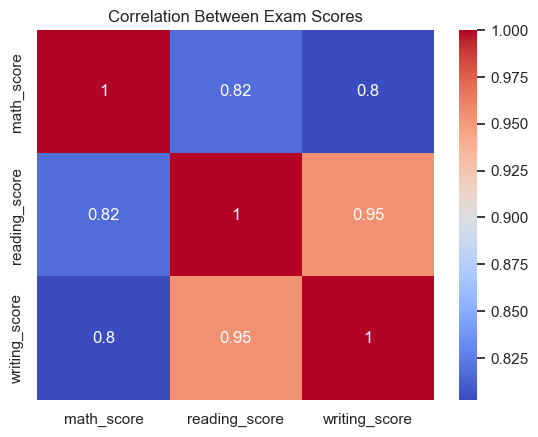

In [13]:
plt.figure()
sns.heatmap(df[["math_score","reading_score","writing_score"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Between Exam Scores")
plt.show()


Reading and writing scores strongly correlate with math scores

These features are strongly associated with overall exam performance

Dectect Outliers

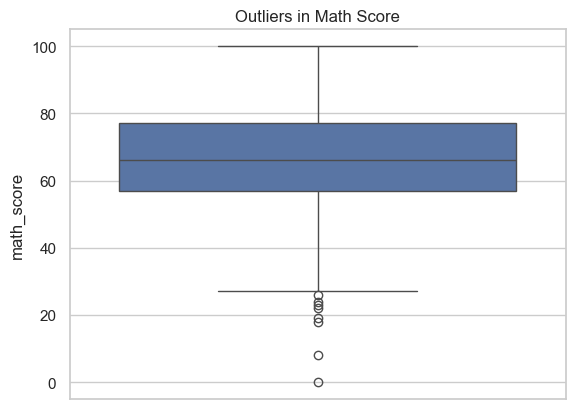

In [14]:
plt.figure()
sns.boxplot(y=df["math_score"])
plt.title("Outliers in Math Score")
plt.show()


Some extreme low/high scores detected

Could be data entry errors or exceptional students

1.Strong predictors of performance: reading & writing scores

2.Slight demographic bias may exist

3.Dataset is mostly clean

4.Score distributions show mild skewness

5.No major data leakage observed